# ML Lab 3 Tasks
<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marcinsawinski/UEP_KIE_ML_CLASS/blob/main/03_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Note!
Check hints in [Cheatsheet](https://colab.research.google.com/github/marcinsawinski/UEP_KIE_ML_CLASS/blob/main/00_cheatsheet.ipynb)

# Task 3.1
_Get mnist data_

```python
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
```
_Train simple model:_
- Inspect dataset
- Train binary Binary Classifier 5 or not 5 with SGDClassifier
- Measure Accuracy Using Cross-Validation

_Type your code below_

In [12]:
from sklearn.datasets import fetch_openml
import numpy as np

# Load MNIST
mnist = fetch_openml("mnist_784", as_frame=False)
X = mnist.data
y = mnist.target.astype(np.int8)

# Create binary target: 1 if digit==5 else 0
y_5 = (y == 5)

In [13]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(random_state=42)
accuracy_scores = cross_val_score(sgd_clf, X, y_5, cv=3, scoring="accuracy")

print("Cross-val accuracy:", accuracy_scores)
print("Mean accuracy:", accuracy_scores.mean())

Cross-val accuracy: [0.96794377 0.94797069 0.96194231]
Mean accuracy: 0.9592855905973937


# Task 3.2
_Check model results_
- Check Confusion Matrix
- Get Precision,  Recall and f1 score
_Check Precision/Recall Trade-off_
- Experiment with different threshold values
- Calculate precision-recall curve and make precision-recall plot
- Calculate ROC curve and make ROC curve plot
- Calcuate ROC AUC score

_Type your code below_

In [14]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Predictions from CV
y_pred = cross_val_predict(sgd_clf, X, y_5, cv=3)

print("Confusion matrix:")
print(confusion_matrix(y_5, y_pred))

print("Precision:", precision_score(y_5, y_pred))
print("Recall:", recall_score(y_5, y_pred))
print("F1-score:", f1_score(y_5, y_pred))

Confusion matrix:
[[61910  1777]
 [ 1073  5240]]
Precision: 0.7467578737352145
Recall: 0.8300332646919056
F1-score: 0.7861965491372843


In [15]:
y_scores = cross_val_predict(
    sgd_clf, X, y_5, cv=3, method="decision_function"
)

In [17]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_5, y_scores)

print("Thresholds length:", len(thresholds))
print("Example threshold tuning: threshold=0")
y_pred_custom = (y_scores > 0)
print("Precision:", precision_score(y_5, y_pred_custom))
print("Recall:", recall_score(y_5, y_pred_custom))

Thresholds length: 70000
Example threshold tuning: threshold=0
Precision: 0.7467578737352145
Recall: 0.8300332646919056


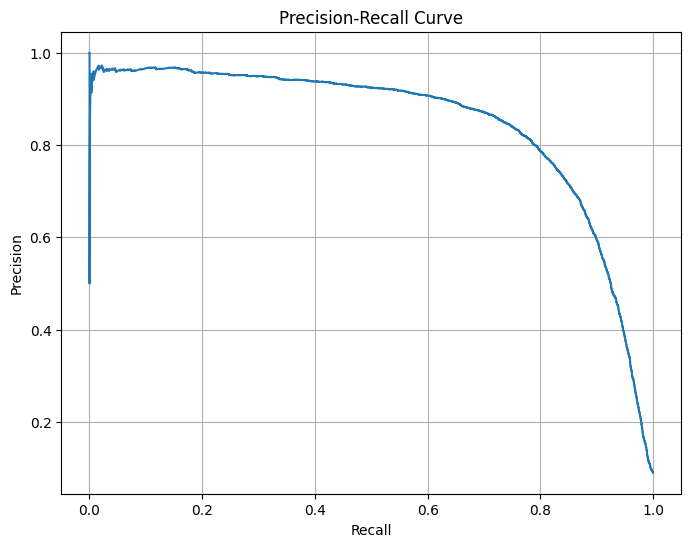

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()

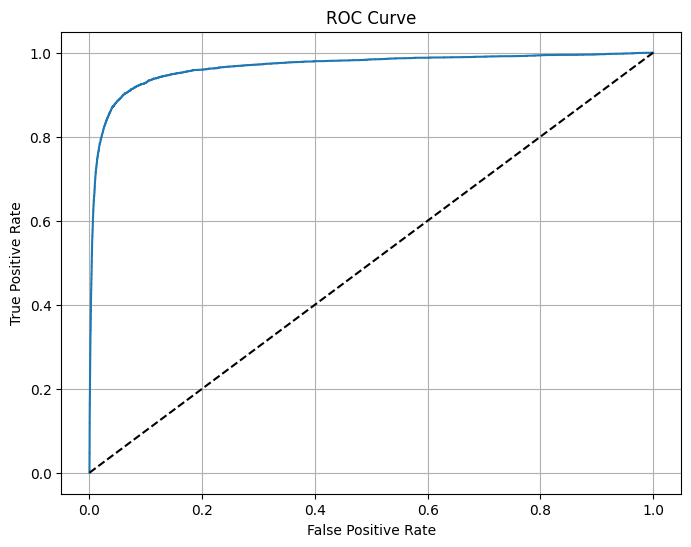

ROC AUC: 0.966907458229373


In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresh = roc_curve(y_5, y_scores)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid(True)
plt.show()

print("ROC AUC:", roc_auc_score(y_5, y_scores))

# Task 3.3
_Compare 2 models_
- Train binary Binary Classifier 5 or not 5 with RandomForestClassifier
- Compare results of  RandomForestClassifier with SGDClassifier usign precision-recall curve plot

_Type your code below_

# Task 3.4
_Perform Multiclass Classification_
- Train binary Multiclass Classifier (0-9) with Support Vector Classifier (SVC)

_Error Analysis_
- display multiclass Confusion Matrix
- display multiclass Confusion Matrix normalized by row

_Type your code below_

# Task 3.5
 _Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the `KNeighborsClassifier` works quite well for this task; you just need to find good hyperparameter values (try a grid search on the `weights` and `n_neighbors` hyperparameters)._

 _Type your code below_

# Task 3.6
_Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. You can use the `shift()` function from the `scipy.ndimage` module. For example, `shift(image, [2, 1], cval=0)` shifts the image two pixels down and one pixel to the right. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called _data augmentation_ or _training set expansion_._


_Type your code below_

# Task 3.7
_Solve Titanic challenge on [Kaggle](https://www.kaggle.com/c/titanic). Alternatively, or get two CSV files: train.csv and test.csv  from :_
```python
url_titanic_train = 'https://github.com/marcinsawinski/UEP_KIE_ML_LAB_PROG/raw/main/datasets/titanic/train.csv'
url_titanic_test = 'https://github.com/marcinsawinski/UEP_KIE_ML_LAB_PROG/raw/main/datasets/titanic/test.csv'
```

 _The goal is to train a classifier that can predict the `Survived` column based on the other columns._

# Task 3.8

_Build a spam classifier:_

* _Download examples of spam and ham from [Apache SpamAssassin's public datasets](https://spamassassin.apache.org/old/publiccorpus/)._
* _Unzip the datasets and familiarize yourself with the data format._
* _Split the datasets into a training set and a test set._
* _Write a data preparation pipeline to convert each email into a feature vector. Your preparation pipeline should transform an email into a (sparse) vector that indicates the presence or absence of each possible word. For example, if all emails only ever contain four words, "Hello," "how," "are," "you," then the email "Hello you Hello Hello you" would be converted into a vector [1, 0, 0, 1] (meaning [“Hello" is present, "how" is absent, "are" is absent, "you" is present]), or [3, 0, 0, 2] if you prefer to count the number of occurrences of each word._

_You may want to add hyperparameters to your preparation pipeline to control whether or not to strip off email headers, convert each email to lowercase, remove punctuation, replace all URLs with "URL," replace all numbers with "NUMBER," or even perform _stemming_ (i.e., trim off word endings; there are Python libraries available to do this)._

_Finally, try out several classifiers and see if you can build a spam classifier, with both high recall and high precision._